In [219]:
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn import linear_model

# Reading Data

In [220]:
def segmentWords(s): 
    return s.split()

def readFile(fileName):
    # Function for reading file
    # input: filename as string
    # output: contents of file as list containing single words
    contents = []
    f = open(fileName)
    for line in f:
        contents.append(line)
    f.close()
    result = segmentWords('\n'.join(contents))
    return result

#### Create a Dataframe containing the counts of each word in a file

In [221]:
d = []

for c in os.listdir("data_training"):
    directory = "data_training/" + c
    for file in os.listdir(directory):
        words = readFile(directory + "/" + file)
        e = {x:words.count(x) for x in words}
        e['__FileID__'] = file
        e['__CLASS__'] = directory[-3:]
        d.append(e)
        
df = pd.DataFrame(d).fillna(0)


In [222]:
df = df.drop(["__FileID__", "__CLASS__"], axis = 1)

Create a dataframe from d - make sure to fill all the nan values with zeros.

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html


In [223]:
# Generates labels to classify on (0 for negative, 1 for positive)
results = []
for dic in d:
    if dic["__CLASS__"] == "neg":
        results += [0]
    else:
        results += [1]

results = np.array(results)
assert len(results) == len(d) #sanity test, checks if the two are equal lengths)

#### Split data into training and validation set 

* Sample 80% of your dataframe to be the training data

* Let the remaining 20% be the validation data (you can filter out the indicies of the original dataframe that weren't selected for the training data)

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [224]:
keep = np.random.rand(len(df)) < 0.8 #gets boolean array of true of about 80% of the indices
X_train = df[keep]
Y_train = results[keep]
X_test = df[~keep]
Y_test = results[~keep]

* Split the dataframe for both training and validation data into x and y dataframes - where y contains the labels and x contains the words

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

# Logistic Regression

#### Basic Logistic Regression
* Use sklearn's linear_model.LogisticRegression() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [252]:
logReg = linear_model.LogisticRegression()
logReg.fit(X_train, Y_train)
val = logReg.score(X_test, Y_test) #gets accuracy of the regression model on the test data set aside, about 82%
print(val)  
print(logReg.score(X_train, Y_train)) #perfect accuracy on training data

0.823728813559
1.0


#### Changing Parameters

In [226]:
logRegL1 = linear_model.LogisticRegression(penalty = "l1")
logRegL1.fit(X_train, Y_train)
val = logRegL1.score(X_test, Y_test) #gets accuracy of the regression model with L1 on the test data set aside, about 80%
print(val)  

0.796610169492


In [227]:
logRegL2 = linear_model.LogisticRegression(penalty = "l2", max_iter = 5)
logRegL2.fit(X_train, Y_train)
val = logRegL2.score(X_test, Y_test) #gets accuracy of the regression model with iteration changed, about 82%
print(val)  

0.823728813559


#### Feature Selection
* In the backward stepsize selection method, you can remove coefficients and the corresponding x columns, where the coefficient is more than a particular amount away from the mean - you can choose how far from the mean is reasonable.

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html

In [228]:
contains = df.copy()
contains[contains != 0] = 1
counts = contains.sum(axis = 0)
counts = counts[counts > 5] #removes all the values where a word occurs in less than 5 reviews
print(counts.mean(), counts.std()) #mean is 47, std is 131, not very helpful

47.07726100658963 130.91053635492503


In [229]:
totals = df[counts.index].sum(axis = 0)
print(totals.mean(), totals.std()) #mean is 107, std is 1230

107.16082513609015 1229.8820962573634


In [230]:
avg = totals / counts #playing around with the average like this is not very helpful, because there are no values less than 1 which makes it hard to select features
print(avg.mean(), avg.std()) #mean is 1.25, std is 0.84

1.2545832949484312 0.8434438884436462


In [231]:
a = totals / len(counts) #checks the number of times each word occurs on average across all reviews
print(a.mean(), a.std()) #mean is 0.01, std is 0.11

0.010234058364634483 0.11745603058517363


In [232]:
totals = totals[totals >= 10] #removes all the words who occur in a total of less than 10 times across the 1600 odd reviews

In [233]:
mod = df[totals.index]
mod.head()

,!,"""",#1,#2,$100,$200,$50,&,','60s,...,youth,yuppie,zahn,zane,zany,zellweger,zero,zeta-jones,zone,zooms
0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


How did you select which features to remove? Why did that reduce overfitting?

In [234]:
#initializes new set of training and test sets
keep = np.random.rand(len(mod)) < 0.8 #gets boolean array of true of about 80% of the indices
Xrem_train = mod[keep]
Yrem_train = results[keep]
Xrem_test = mod[~keep]
Yrem_test = results[~keep]

In [235]:
logReg = linear_model.LogisticRegression()
logReg.fit(Xrem_train, Yrem_train)
val = logReg.score(Xrem_test, Yrem_test) #gets accuracy of the regression model on the test data set aside, about 85%
print(val) #went up a WHOLE 3%!!!! guess the feature removal didn't do much

0.849529780564


# Single Decision Tree

#### Basic Decision Tree

* Initialize your model as a decision tree with sklearn.
* Fit the data and labels to the model.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [253]:
from sklearn import tree
dTree = tree.DecisionTreeClassifier()
dTree.fit(X_train, Y_train)
val = dTree.score(X_test, Y_test)
print(val) #The accuracy of the model is about 68%
print(dTree.score(X_train, Y_train)) #perfect accuracy in training data

0.677966101695
1.0


#### Changing Parameters
* To test out which value is optimal for a particular parameter, you can either loop through various values or look into sklearn.model_selection.GridSearchCV

References:


http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [260]:
#might have been causing bugs
df = df.rename(columns = {'fit' : "FIT"}) 

In [279]:
from sklearn import model_selection
dtree = tree.DecisionTreeClassifier()
depth = list(range(10,100,10))
parameters = {"max_depth" : depth}
gridS = model_selection.GridSearchCV(dtree, parameters)
gridS.fit(df, results)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [280]:
gridS.cv_results_

{'mean_fit_time': array([ 3.86118531,  3.97974078,  3.8789684 ,  3.75073719,  4.02684458,
         3.91321365,  4.03707194,  3.79144104,  3.98977367]),
 'mean_score_time': array([ 0.41895183,  0.36112491,  0.29602591,  0.2995255 ,  0.3232975 ,
         0.30991968,  0.36127059,  0.28695973,  0.34287572]),
 'mean_test_score': array([ 0.62625 ,  0.62    ,  0.63125 ,  0.625625,  0.63125 ,  0.62375 ,
         0.631875,  0.62875 ,  0.62375 ]),
 'mean_train_score': array([ 0.92751205,  0.9987498 ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ]),
 'param_max_depth': masked_array(data = [10 20 30 40 50 60 70 80 90],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': ({'max_depth': 10},
  {'max_depth': 20},
  {'max_depth': 30},
  {'max_depth': 40},
  {'max_depth': 50},
  {'max_depth': 60},
  {'max_depth': 70},
  {'max_depth': 80},
  {'max_depth': 90}),
 'rank_test_score': array([5, 

How did you choose which parameters to change and what value to give to them? Feel free to show a plot.

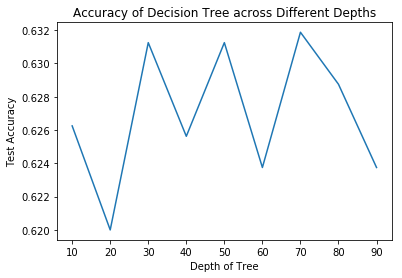

In [281]:
#unfortunately, my macbook air is not powerful enough to do more computations before the universe blows up
import matplotlib.pyplot as plt
plt.plot(depth, gridS.cv_results_['mean_test_score'])
plt.ylabel("Test Accuracy")
plt.xlabel("Depth of Tree")
plt.title("Accuracy of Decision Tree across Different Depths")
plt.show()

Why is a single decision tree so prone to overfitting?

# Random Forest Classifier

#### Basic Random Forest

* Use sklearn's ensemble.RandomForestClassifier() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [267]:
from sklearn import ensemble
rForest = ensemble.RandomForestClassifier()
rForest.fit(X_train, Y_train)
RFscore = rForest.score(X_test, Y_test)
print(RFscore) #test score is 67%
print(rForest.score(X_train, Y_train)) #training score is 99%

0.674576271186
0.991570881226


#### Changing Parameters

In [273]:
#play around with the number of trees
rFor = ensemble.RandomForestClassifier()
num = list(range(15,150,15))
parameters = {"n_estimators" : num}
gridF = model_selection.GridSearchCV(rFor, parameters)
gridF.fit(df, results)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [15, 30, 45, 60, 75, 90, 105, 120, 135]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

What parameters did you choose to change and why?

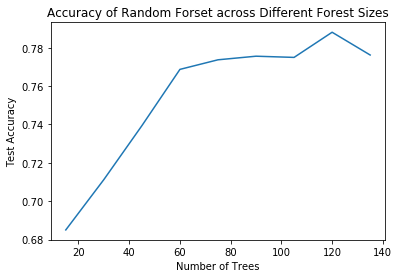

In [274]:
plt.plot(num, gridF.cv_results_['mean_test_score'])
plt.ylabel("Test Accuracy")
plt.xlabel("Number of Trees")
plt.title("Accuracy of Random Forset across Different Forest Sizes")
plt.show()

How does a random forest classifier prevent overfitting better than a single decision tree?

In [278]:
gridF.cv_results_

{'mean_fit_time': array([ 2.49638096,  2.24348799,  2.66984264,  3.28940002,  4.35948706,
         4.86069981,  5.55503074,  6.210893  ,  7.09367514]),
 'mean_score_time': array([ 0.40332063,  0.25835943,  0.26743038,  0.29497337,  0.40457122,
         0.37963319,  0.41709097,  0.44089429,  0.45117164]),
 'mean_test_score': array([ 0.685   ,  0.71125 ,  0.739375,  0.76875 ,  0.77375 ,  0.775625,
         0.775   ,  0.788125,  0.77625 ]),
 'mean_train_score': array([ 0.99843769,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ]),
 'param_n_estimators': masked_array(data = [15 30 45 60 75 90 105 120 135],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': ({'n_estimators': 15},
  {'n_estimators': 30},
  {'n_estimators': 45},
  {'n_estimators': 60},
  {'n_estimators': 75},
  {'n_estimators': 90},
  {'n_estimators': 105},
  {'n_estimators': 120},
  {'n_estimators': 1